<a href="https://colab.research.google.com/github/Mugishajean-Livin250/Rain-forest/blob/main/Rainforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [5]:
import seaborn as sns
titanic_papa = sns.load_dataset("titanic")
titanic_papa.tail()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [6]:
data = titanic_papa[['survived', 'pclass','sex','age','sibsp','parch','fare','embarked']]

In [10]:
data['age'].fillna(data['age'].median(), inplace = True)
data['embarked'].fillna(data['embarked'].mode()[0], inplace= True)

/tmp/ipython-input-2483583745.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].median(), inplace = True)
/tmp/ipython-input-2483583745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'].fillna(data['age'].median(), inplace = True)
/tmp/ipython-input-2483583745.py:2: SettingWithCopyWarning: 
A valu

In [11]:
data = pd.get_dummies(data, columns= ['sex', 'embarked'], drop_first = True)

In [13]:
x= data.drop("survived", axis=1)
y = data["survived"]
x_train, x_test, y_train, y_text= train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
model = RandomForestClassifier(n_estimators = 200, random_state = 42)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [16]:
y_pred= model.predict(x_test)

In [18]:
print("Accuracy", accuracy_score(y_text, y_pred))
print(classification_report(y_text, y_pred))

Accuracy 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



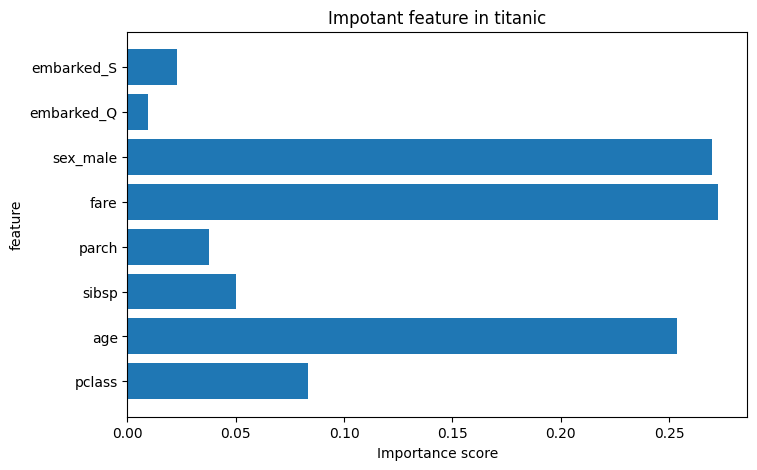

In [23]:
import matplotlib.pyplot as plt
importances = model.feature_importances_
feature_names= x.columns
plt.figure(figsize=(8,5))
plt.barh(feature_names, importances)
plt.xlabel('Importance score')
plt.ylabel('feature')
plt.title('Impotant feature in titanic')
plt.show()